# Actividad 2_10: Repaso

En esta Actividad vamos a repasar los conceptos que hemos visto hasta ahora en clase.

Descarga el archivo "Top 100 Cryptocurrency 2022.csv" que se adjunta con la tarea y realiza los siguientes apartados:

Debes escribir una programa que realice las siguientes tareas:

1. Importar los datos del dataset adjunto con la tarea y guardarlos en un DataFrame.
2. Crea una función que reciba un número (debes tratar la excepción en caso de que no sea un entero) y el dataframe y devuelva un DataFrame en el que haya eliminado todas las criptomonedas que no superen el número pasado como parámetro. Prueba la función.
3. Normaliza la columna del precio actual de las criptomonedas ("Price") y muestre una gráfica con los valores de las 10 que tienen mayor valor.
4. Predice el próximo valor de las criptomonedas suponiendo que la variación de las próximas 24h  va a ser la misma que en las anteriores ('Changes 24H') y mételo en una columna nueva.

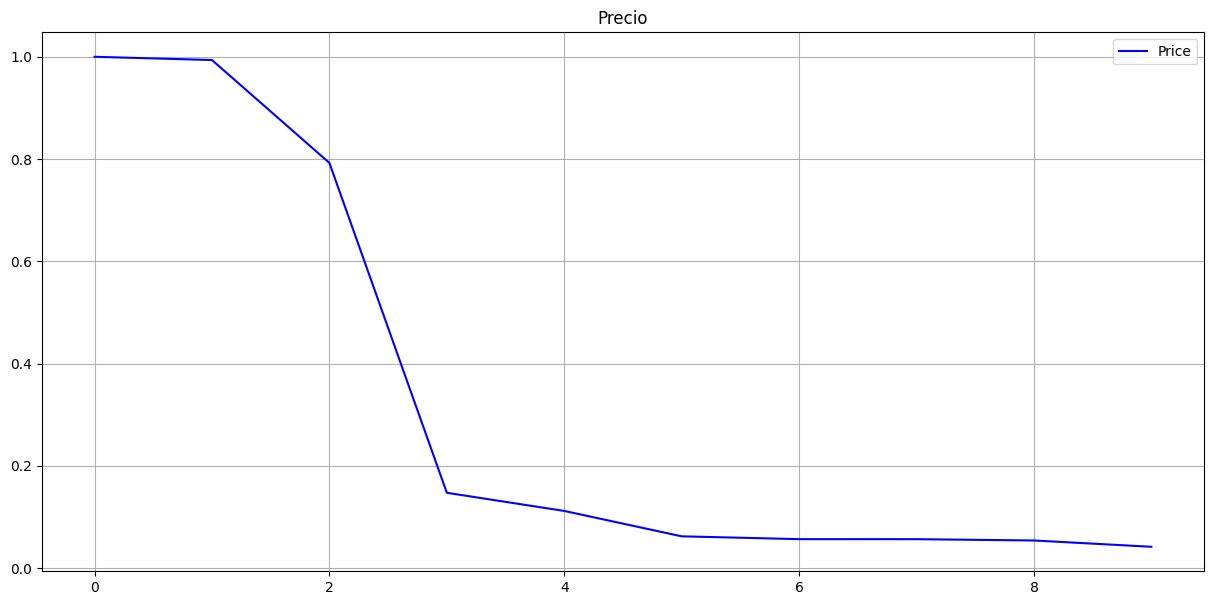

     Price  Changes 24H  Predicted Price
0  36983.0        -2.97       35884.6049
1  37019.0        -2.84       35967.6604
2  36942.0        -4.24       35375.6592
3   2510.0        -3.64        2418.6360
4   2494.0        -3.23        2413.4438


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler


df = pd.read_csv("Top 100 Cryptocurrency 2022.csv")
df.head()

def recibir_num(num, df):
    try:
        num = float(num)

        # Quitar espacios en blanco en todas las columnas
        df.columns = df.columns.str.strip()

        # Limpiar los filas
        df["Price"] = df["Price"].astype(str).str.replace("$", "").str.replace(",", "").str.replace("\"", "").astype(float)
        df["Changes 24H"] = df["Changes 24H"].astype(str).str.replace("$", "").str.replace("%", "").str.replace(",", "").astype(float)

        name = []
        price = []
        changes = []

        # Comprobrar que Price sea menos que num
        filtrado = df[df["Price"] < num]

        name = filtrado["Crypto Name"].tolist()
        price = filtrado["Price"].tolist()
        changes = filtrado["Changes 24H"].tolist()

        df_eliminados = pd.DataFrame ({
            "Crypto Name": name,
            "Price": price,
            "Changes 24H": changes
        })

        return df_eliminados.head(100)

    except ValueError:
        print("ERROR: num debe ser numérico")

df_norm = recibir_num(10000.00, df)
recibir_num(10000.00, df)

escalador = MinMaxScaler()

df_norm[["Price", "Changes 24H"]] = escalador.fit_transform(df_norm[["Price", "Changes 24H"]])

df_norm.head()

top10_prices = df_norm.sort_values(by="Price", ascending=False).head(10)
top10_prices.head(100)

plt.figure(figsize=(15,7))

plt.plot(top10_prices["Price"], label="Price", color="blue")

plt.title("Precio")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid(True)
plt.show()

df["Predicted Price"] = df["Price"] * (1 + df["Changes 24H"] / 100)

print(df[["Price", "Changes 24H", "Predicted Price"]].head())
